In [ ]:
import os
import urllib.request
import zipfile
from io import BytesIO
from pathlib import Path

DATASET_URL = "https://huggingface.co/datasets/commaai/commaSteeringControl/resolve/main/data/SYNTHETIC_V0.zip"
DATASET_PATH = Path("/home/karang/amazon_ML/student_resource/Temporary_work/controls_challenge/data")


def download_dataset():
  print("Downloading dataset (0.6G)...")
  DATASET_PATH.mkdir(parents=True, exist_ok=True)
  with urllib.request.urlopen(DATASET_URL) as resp:
    with zipfile.ZipFile(BytesIO(resp.read())) as z:
      for member in z.namelist():
        if not member.endswith('/'):
          with z.open(member) as src, open(DATASET_PATH / os.path.basename(member), 'wb') as dest:
            dest.write(src.read())
if not DATASET_PATH.exists():
    download_dataset()

In [1]:
import pandas as pd
from pathlib import Path

data_dir = Path('./data')
print(f"Checking files in {data_dir}...")

for f in data_dir.glob('*.csv'):
    try:
        df = pd.read_csv(f)
        if 'steerCommand' not in df.columns:
            print(f"❌ INVALID FILE FOUND: {f}")
            print(f"   Columns: {list(df.columns)}")
    except Exception as e:
        print(f"❌ CORRUPT FILE: {f} ({e})")

print("Check complete.")

Checking files in data...
Check complete.


In [2]:
from tinyphysics import TinyPhysicsModel, TinyPhysicsSimulator, CONTROL_START_IDX
from controllers import pid
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme()


/home/karang/anaconda3/envs/vllm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def plot_rollout(sim):
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(sim.target_lataccel_history, label="Target Lateral Acceleration", alpha=0.5)
  ax.plot(sim.current_lataccel_history, label="Actual Lateral Acceleration", alpha=0.5)
  ax.legend()
  ax.set_xlabel("Step")
  ax.set_ylabel("Lateral Acceleration")
  ax.set_title("Rollout")
  plt.show()

In [4]:
model = TinyPhysicsModel("./models/tinyphysics.onnx", debug=True)
controller = pid.Controller()

In [5]:
sim = TinyPhysicsSimulator(model, "./data/00000.csv", controller=controller, debug=False)
sim.rollout()

FileNotFoundError: [Errno 2] No such file or directory: './data/00000.csv'

In [ ]:
from tinyphysics import LataccelTokenizer

token = LataccelTokenizer()
# token.encode(2.3)
token.decode(1023)
# token.bins

5.0

In [ ]:
import torch 
torch.cuda.is_available()
print(torch.__version__)

2.9.1+cu128


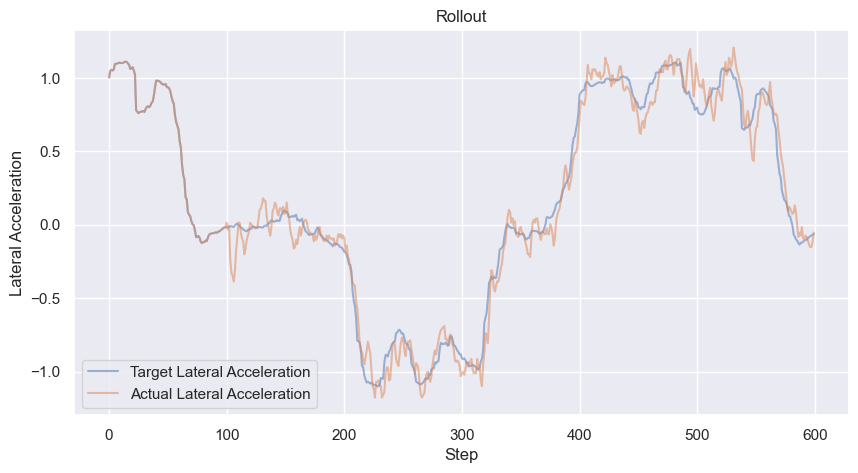

In [ ]:
plot_rollout(sim)